# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement:

 The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has
 
 resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have 
 
 found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.Online hate, 
 
 described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on 
 
 online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   There has 
 
 been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and 
 
 influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on
 
 anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    Internet comments
 
 are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine 
 
 learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive 
 
 towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an
 
 idiot” is clearly offensive.Our goal is to build a prototype of online hate and abuse comment classifier which can used to 
 
 classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
 
 
 
 
 
 


### 1.Uploading Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### a) Uploading Train Dataset

In [2]:
trn_data=pd.read_csv(r"C:\Users\Hi\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")

In [3]:
trn_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


### Description of attributes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [4]:
trn_data.shape

(159571, 8)

### b)Uploading Test Dataset

In [5]:
test_data=pd.read_csv(r"C:\Users\Hi\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")

In [6]:
test_data.shape

(153164, 2)

In [7]:
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

#### Both Train & Test dataset contain no Missing values.

### 2.Data cleaning

#### 2.1. Checking for duplicates and dropping them

In [8]:
trn_data.duplicated().sum()

0

#### 2.2 checking for missing values

In [9]:
trn_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

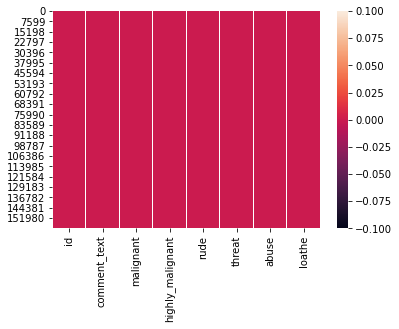

In [10]:
import seaborn as sns
sns.heatmap(trn_data.isnull())

In [11]:
#dropping the column id
trn_data.drop(columns={'id'},inplace=True)

In [12]:
#the complete information about the dataset
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [13]:
trn_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.Explanatory Data Analysis

In [14]:
for i in trn_data.columns:
    print(trn_data[i].value_counts())
    print('------------------------------')

You can do this by putting your opinion at the end of each of the 1,2,3 and 4 section in Talk:Religious_significance_of_Jerusalem#mediation.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             1
"\n THE LATEST \nThis is CUMBEY.  I see the good grammar, good punctuation Billy Weiss entered this space as ""Squeakbox"" and corrected the grammar and typos of ""David"" the alleged Wiki Global Elite Sys Op.  He has also continued to wreak havoc on that website which is independent 

Text(0.5, 1.0, 'malignant')

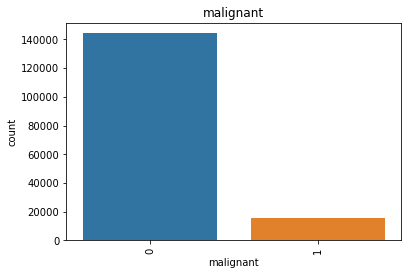

In [15]:
sns.countplot(trn_data['malignant'])
plt.xticks(rotation=90)
plt.title('malignant')

Text(0.5, 1.0, 'rude')

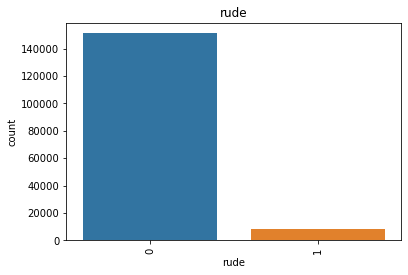

In [16]:
sns.countplot(trn_data['rude'])
plt.xticks(rotation=90)
plt.title('rude')

Text(0.5, 1.0, 'threat')

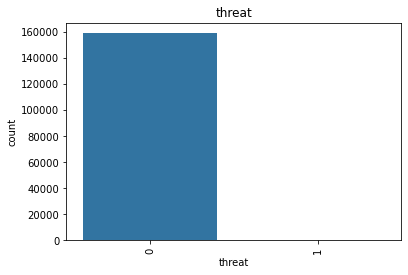

In [17]:
sns.countplot(trn_data['threat'])
plt.xticks(rotation=90)
plt.title('threat')

Text(0.5, 1.0, 'loathe')

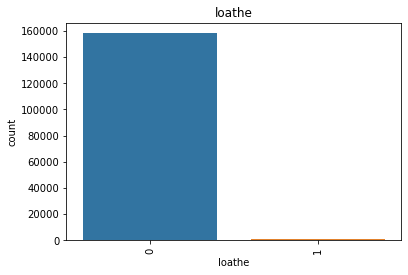

In [18]:
sns.countplot(trn_data['loathe'])
plt.xticks(rotation=90)
plt.title('loathe')

Text(0.5, 1.0, 'highly_malignant')

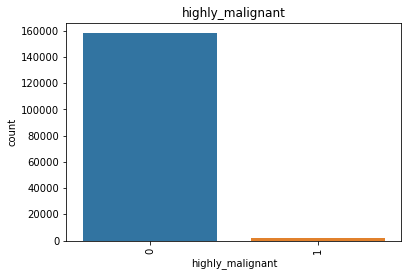

In [19]:
sns.countplot(trn_data['highly_malignant'])
plt.xticks(rotation=90)
plt.title('highly_malignant')

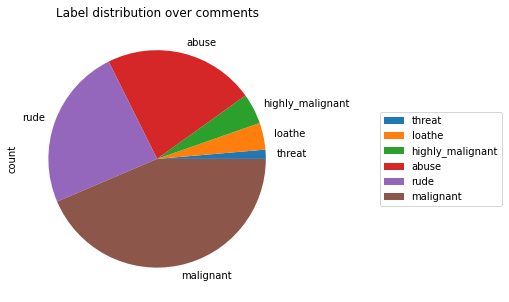

In [20]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = trn_data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [21]:
#Checking correlation of the dataset
corr=trn_data.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


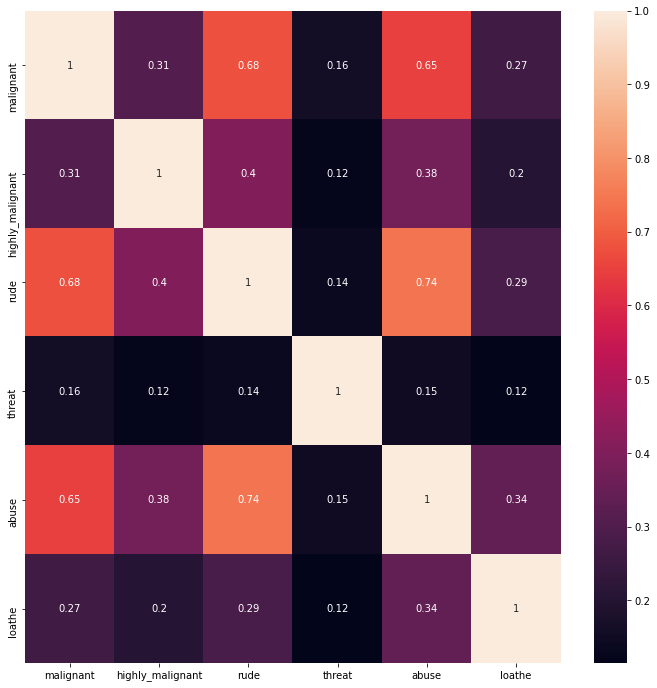

In [22]:
## checking correlation in dataset
plt.figure(figsize=(12,12))
print(sns.heatmap(trn_data.corr(),annot=True))

The highest positive correlation is seen in between fields 'rude' and 'abuse'.

Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.

Almost all variable are correlated with each other negatively.*

In [23]:
#New column for Length of message
trn_data['Original_Length'] = trn_data.comment_text.str.len()
trn_data.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Original_Length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


#### 4.Data Preprocessing

### a)Train dataset

In [24]:
import re
import nltk
from nltk.corpus import stopwords
import re
import string

In [25]:
import re

def decontracted(phrase):
    # specific
   
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
stop_words=stopwords.words('english')

In [28]:
lemmatizer=WordNetLemmatizer()

In [29]:
# Convert all messages to lower case
trn_data['comment_text'] = trn_data['comment_text'].str.lower()

# Replace email addresses with 'email'
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'[?|$|.|!]',r' ')
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'[^\w\d\s]', ' ')
    
# Replace numbers with 'numbr'
trn_data['comment_text'] = trn_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


trn_data['comment_text'] = trn_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))



In [30]:
trn_data['clean_length'] = trn_data.comment_text.str.len()
trn_data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Original_Length,clean_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,67


In [32]:
trn_data['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567    ashamed horrible thing put talk page numbr num...
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [33]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
trn_data['Clean_Length'] = trn_data.comment_text.str.len()
trn_data['Clean_Length'].head()

0    180
1     91
2    141
3    365
4     29
Name: Clean_Length, dtype: int64

In [34]:
trn_data.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Original_Length,clean_length,Clean_Length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,180
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,91,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29,29


In [35]:
# Total length removal in test dataset
print('Original Length:',trn_data.Clean_Length.sum())
print('Clean Length:',trn_data.Original_Length.sum())
print("Total Words Removed:", (trn_data.Original_Length.sum()) - (trn_data.Clean_Length.sum()))

Original Length: 40119808
Clean Length: 62893130
Total Words Removed: 22773322


### B)Test dataset

In [30]:
# Convert all messages to lower case
test_data['comment_text'] = test_data['comment_text'].str.lower()

# Replace email addresses with 'email'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
test_data['comment_text'] = test_data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
test_data['comment_text'] = test_data['comment_text'].str.replace(r'[?|$|.|!]',r' ')
test_data['comment_text'] = test_data['comment_text'].str.replace(r'[^\w\d\s]', ' ')
    
# Replace numbers with 'numbr'
test_data['comment_text'] = test_data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


test_data['comment_text'] =test_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [31]:
test_data['clean_length'] = test_data.comment_text.str.len()
test_data.head()

,id,comment_text,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,227
1,0000247867823ef7,rfc title fine imo,18
2,00013b17ad220c46,source zawe ashton lapland,26
3,00017563c3f7919a,look back source information updated correct f...,109
4,00017695ad8997eb,anonymously edit article,24


In [32]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
test_data['Clean_Length'] = test_data.comment_text.str.len()
test_data['Clean_Length'].head()

0    227
1     18
2     26
3    109
4     24
Name: Clean_Length, dtype: int64

In [33]:
test_data.head(5)

,id,comment_text,clean_length,Clean_Length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,227,227
1,0000247867823ef7,rfc title fine imo,18,18
2,00013b17ad220c46,source zawe ashton lapland,26,26
3,00017563c3f7919a,look back source information updated correct f...,109,109
4,00017695ad8997eb,anonymously edit article,24,24


### 4.2 Tokenization

In [34]:
from nltk import word_tokenize
trn_data['Tokenized_comment_text'] = trn_data['comment_text'].apply(word_tokenize)
trn_data.Tokenized_comment_text

0         [explanation, why, the, edits, made, under, my...
1         [d, aww, he, matches, this, background, colour...
2         [hey, man, i, m, really, not, trying, to, edit...
3         [more, i, can, t, make, any, real, suggestions...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, don, t, think, you, understan...
Name: Tokenized_comment_text, Length: 159571, dtype: object

### 4.3 StopWords

In [35]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'wasn', 'couldn', 'you', 'so', 'that', 'shan', 'while', 'for', "shan't", "she's", 'will', "mightn't", 'their', 'on', 'over', 'ourselves', 'didn', 'am', 'at', 'such', 'her', 'whom', 'then', 'its', 's', 'don', 'does', 'after', "weren't", 'to', 'o', 'just', 'is', 'i', 'too', 'up', 'himself', 'below', 'theirs', 'and', 'an', 'do', 'how', 'by', 'where', 'before', 'only', 'should', 'it', 'were', 'weren', "isn't", 'same', 'the', 'hasn', 'more', 'own', 'against', "you'd", 'aren', 'who', 'been', 'other', 'ma', 'above', 'shouldn', 'mustn', 'out', 'our', 'each', 'm', 'isn', 'needn', 'she', 'he', 'there', 'down', 'has', 'until', 'any', 'herself', 't', 'had', 'itself', 'hers', 'having', 'but', 'during', 'doesn', "wasn't", 'if', 've', 'when', 'why', 'your', 'they', "aren't", 'won', 'those', 'these', 'off', 'no', 'what', "didn't", "needn't", 'a', 'ours', 'through', "should've", 'here', 'because', 'all', 'both', "hadn't", "shouldn't", 'into', 'me', 'further', 'are', "hasn't", "doesn't", "you'll", 'in'

In [36]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

trn_data['comment_text'] = trn_data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Hi\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


### 4.4 Stemming

In [37]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    text ="".join(text)
    return text

trn_data['Stemmed_comment_text'] = trn_data['Tokenized_comment_text'].apply(stemming)
trn_data.Stemmed_comment_text

0         explanwhitheeditmadeundermyusernamhardcormetal...
1         dawwhematchthisbackgroundcolourimseemstuckwith...
2         heymanimreallinottritoeditwaritsjustthatthisgu...
3         moreicantmakeanirealsuggestonimproviwonderifth...
4           yousiraremyheroanichancyouremembwhatpagethatson
                                ...                        
159566    andforthesecondtimeofaskwhenyourviewcompletcon...
159567    youshouldbeashamofyourselfthatisahorriblthingy...
159568    spitzerummtherenoactualarticlforprostitutringc...
159569    anditlooklikeitwasactualyouwhoputonthespeedito...
159570    andireallidontthinkyouunderstandicamehereandmy...
Name: Stemmed_comment_text, Length: 159571, dtype: object

### 4.5 Lemmantizing

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmantizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    text ="".join(text)
    return text

trn_data['Lemmantized_comment_text'] = trn_data['Tokenized_comment_text'].apply(lemmantizing)
trn_data.Lemmantized_comment_text

0         explanationwhytheeditsmadeundermyusernamehardc...
1         dawwhematchthisbackgroundcolourimseeminglystuc...
2         heymanimreallynottryingtoeditwaritsjustthatthi...
3         moreicantmakeanyrealsuggestiononimprovementiwo...
4         yousiraremyheroanychanceyourememberwhatpagetha...
                                ...                        
159566    andforthesecondtimeofaskingwhenyourviewcomplet...
159567    youshouldbeashamedofyourselfthatisahorriblethi...
159568    spitzerummtherenoactualarticleforprostitutionr...
159569    anditlooklikeitwaactuallyyouwhoputonthespeedyt...
159570    andireallydontthinkyouunderstandicamehereandmy...
Name: Lemmantized_comment_text, Length: 159571, dtype: object

In [39]:
# New column (clean_length) after puncuations,stopwords removal
trn_data['clean_length'] = trn_data.comment_text.str.len()
trn_data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Original_Length,Tokenized_comment_text,Stemmed_comment_text,Lemmantized_comment_text,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,"[explanation, why, the, edits, made, under, my...",explanwhitheeditmadeundermyusernamhardcormetal...,explanationwhytheeditsmadeundermyusernamehardc...,182
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,"[d, aww, he, matches, this, background, colour...",dawwhematchthisbackgroundcolourimseemstuckwith...,dawwhematchthisbackgroundcolourimseeminglystuc...,93
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,"[hey, man, i, m, really, not, trying, to, edit...",heymanimreallinottritoeditwaritsjustthatthisgu...,heymanimreallynottryingtoeditwaritsjustthatthi...,141
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,"[more, i, can, t, make, any, real, suggestions...",moreicantmakeanirealsuggestonimproviwonderifth...,moreicantmakeanyrealsuggestiononimprovementiwo...,374
4,sir hero chance remember page,0,0,0,0,0,0,67,"[you, sir, are, my, hero, any, chance, you, re...",yousiraremyheroanichancyouremembwhatpagethatson,yousiraremyheroanychanceyourememberwhatpagetha...,29


In [40]:
!pip install wordcloud

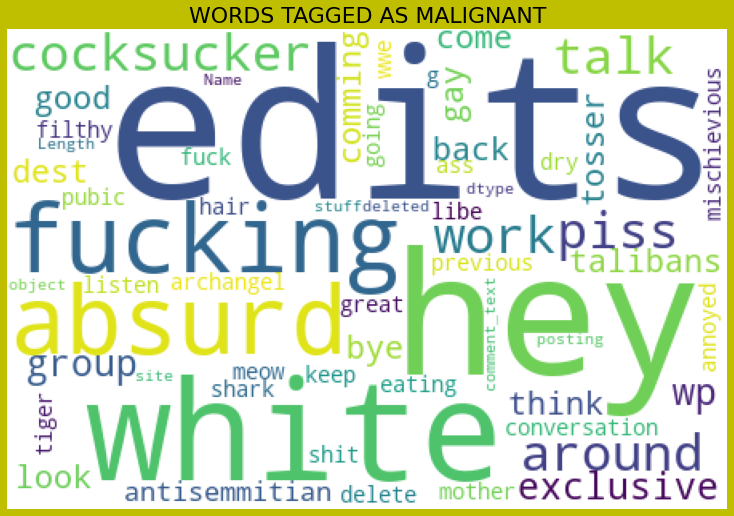

In [41]:
# Plotting for malignant
from wordcloud import WordCloud
trn_malignant=trn_data[(trn_data['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22})
plt.show()

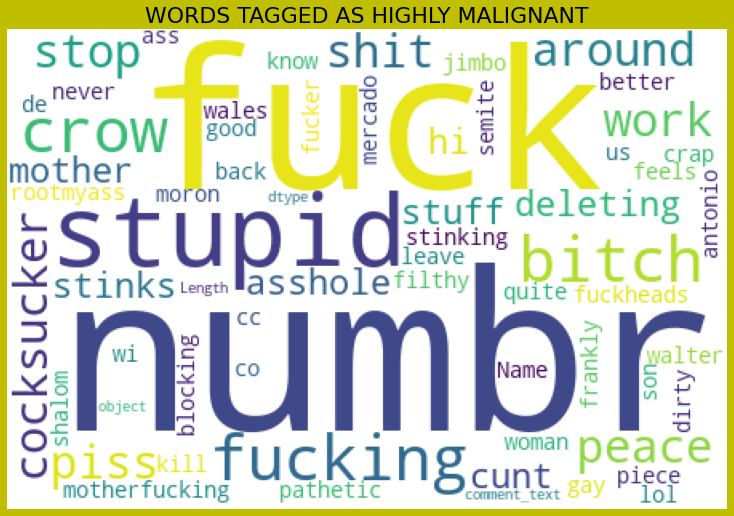

In [42]:
# Plotting for highly_malignant
trn_highlymalignant=trn_data[(trn_data['highly_malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':22})
plt.show()

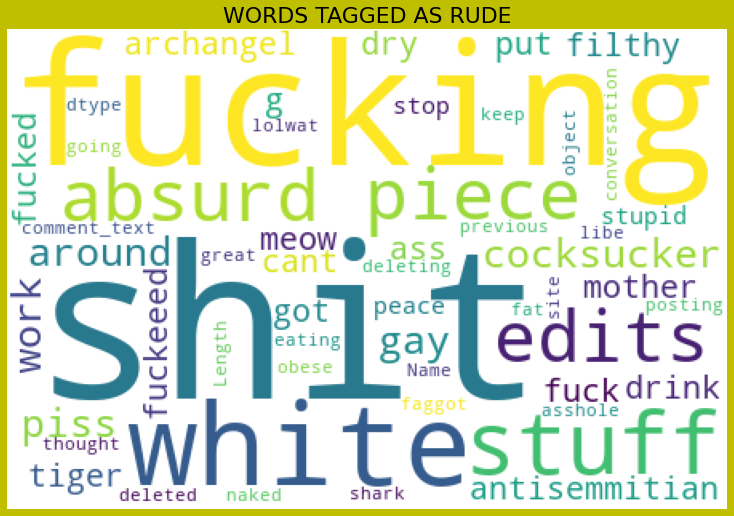

In [43]:
# Plotting for 'rude'
trn_rude=trn_data[(trn_data['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22})
plt.show()

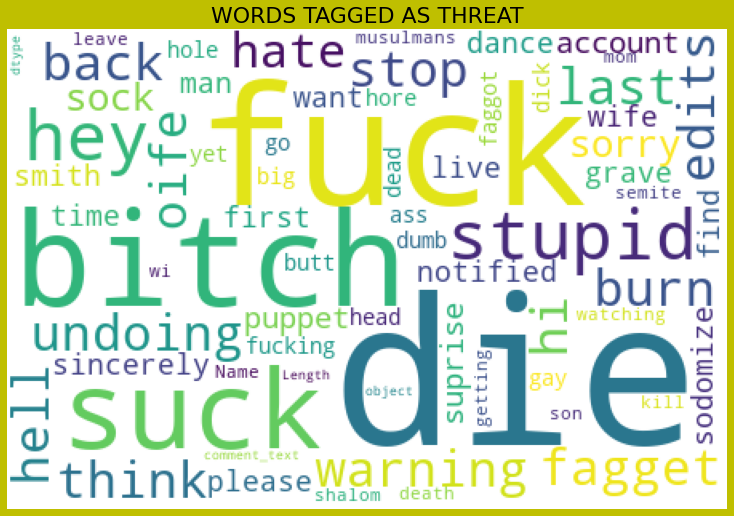

In [44]:
# Plotting for threat
trn_threat=trn_data[(trn_data['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22})
plt.show()

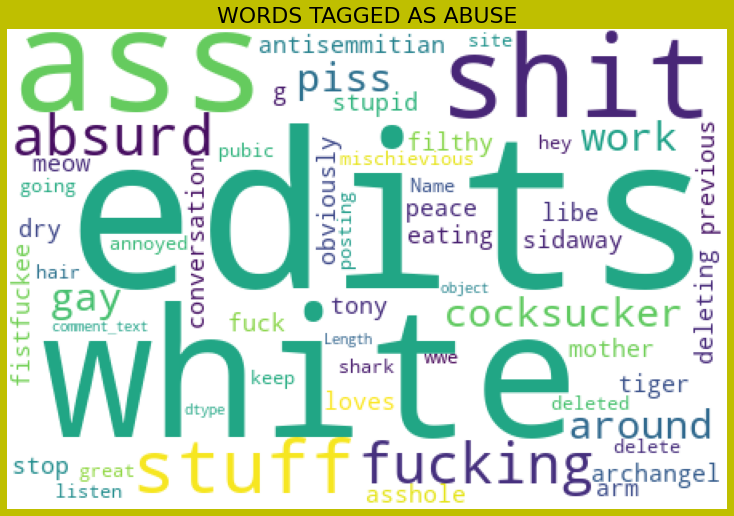

In [45]:
# Plotting for abuse
trn_abuse=trn_data[(trn_data['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22})
plt.show()

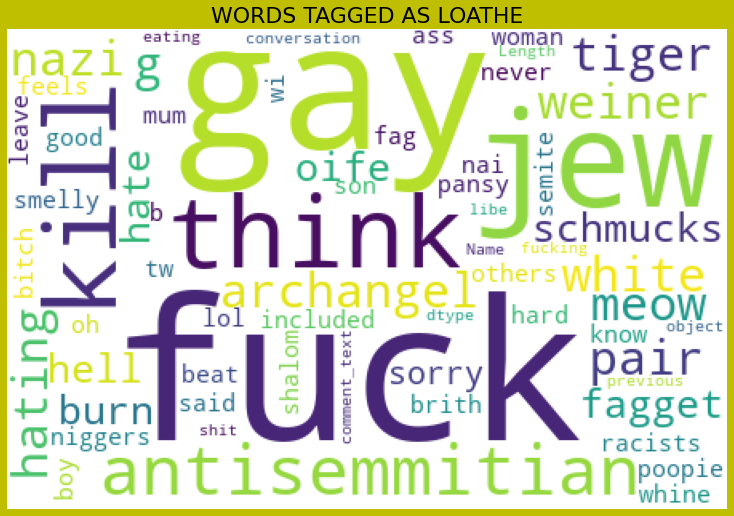

In [46]:
# Plotting for loathe
trn_loathe=trn_data[(trn_data['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22})
plt.show()

### Vectorization to convert text into numeric

#### for Train dataset

### 6.1 Data Encoding

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [49]:
target_data = trn_data[cols_target]

trn_data['bad'] =trn_data[cols_target].sum(axis =1)
print(trn_data['bad'].value_counts())
trn_data['bad'] = trn_data['bad'] > 0 
trn_data['bad'] = trn_data['bad'].astype(int)
print(trn_data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


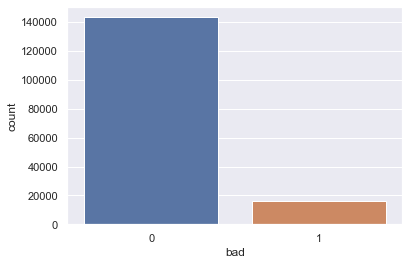

In [50]:
sns.set()
sns.countplot(x="bad" , data = trn_data)
plt.show()

In [51]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
review = tf.fit_transform(trn_data['comment_text'])
X=review
Y=trn_data['bad']

In [52]:
X.shape

(159571, 180222)

In [53]:
Y.shape

(159571,)

#### for Test dataset

In [55]:
# Doing the above process for test data 
tf_vec = TfidfVectorizer()
test_vec = tf_vec.fit_transform(test_data['comment_text'])
test_vec

<153164x226436 sparse matrix of type '<class 'numpy.float64'>'
	with 3759135 stored elements in Compressed Sparse Row format>

In [56]:
test_vec.shape

(153164, 226436)

# 7.Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=56, test_size=.3)
print('Training  matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training  matrix size: (111699, 180222)
Training target vector size: (111699,)
Test feature matrix size: (47872, 180222)
Test target vector size: (47872,)


### Finding best Random state

In [46]:
maxAccu=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9559241310160428 on Random_state 88


### 1.Logistics Regression

In [59]:
# Creating train_test_split using best random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=88, test_size=.3)

In [69]:
from sklearn.linear_model import LogisticRegression
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))
#Accuracy Score
print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
# classification report
print('classification Report of Logistics Regression :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.9578151997779747
Testing accuracy : 0.9557779077540107
Accuracy Score of Logistics Regression : 0.9557779077540107
classification Report of Logistics Regression :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43111
           1       0.94      0.59      0.73      4761

    accuracy                           0.96     47872
   macro avg       0.95      0.79      0.85     47872
weighted avg       0.96      0.96      0.95     47872

Confusion matrix of Logistics Regression :
 [[42946   165]
 [ 1952  2809]]


In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_lg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', model_lg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.95447282 0.95425205 0.95321802 0.95447139 0.95343736]
Mean CV Score : 0.953970329806239
Std deviation : 0.0005353399282923333


## 2.Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of DecisionTreeClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of DecisionTreeClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.9997403736828441
Testing accuracy : 0.9441844919786097
Accuracy Score of DecisionTreeClassifier : 0.9441844919786097
classification Report of DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     43111
           1       0.73      0.70      0.71      4761

    accuracy                           0.94     47872
   macro avg       0.85      0.84      0.84     47872
weighted avg       0.94      0.94      0.94     47872

Confusion matrix of DecisionTreeClassifier :
 [[41860  1251]
 [ 1421  3340]]


In [57]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_dt, X, Y, cv =3)
print('Cross Validation Score', model_dt, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.94279107 0.94149276 0.94363602]
Mean CV Score : 0.9426399524279395
Std deviation : 0.0008814832549460678


# 3.SVC

In [48]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of SVC :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of SVC :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of SVC :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.9857742683461803
Testing accuracy : 0.9581592580213903
Accuracy Score of SVC : 0.9581592580213903
classification Report of SVC :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43111
           1       0.93      0.62      0.75      4761

    accuracy                           0.96     47872
   macro avg       0.95      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872

Confusion matrix of SVC :
 [[42896   215]
 [ 1788  2973]]


In [49]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_svc, X, Y, cv =3)
print('Cross Validation Score', model_svc, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.95596999 0.95512314 0.95501034]
Mean CV Score : 0.9553678262204993
Std deviation : 0.0004282806702041863


# Hyper parameter tuning

### 1.LogisticRegression

In [67]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X,Y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.9585074940602698


In [70]:
# creating the model
model = LogisticRegression(C= 31.622776601683793)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9904654473182392
Testing accuracy : 0.9602272727272727
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43111
           1       0.94      0.59      0.73      4761

    accuracy                           0.96     47872
   macro avg       0.95      0.79      0.85     47872
weighted avg       0.96      0.96      0.95     47872

[[42946   165]
 [ 1952  2809]]


### cross validation score

In [71]:
lg_cv=cross_val_score(model,X,Y,scoring='accuracy', cv = 3).mean()
lg_cv

0.9579121521112204

# 2. DecisionTreeClassifier

In [60]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [42]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [55]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [56]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [61]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [62]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [63]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',max_depth=10,min_samples_leaf= 2, min_samples_split= 3)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9398813502673797


### Final Model is Logistic Regression.Final Model is giving us Accuracy score of 95.98% which is slightly improved compare to earlier Accuracy score of 95.59%.

# 8.Evaluation

### AUC-ROC curve

In [40]:
# train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# RandomForestClassifier
model1 =LogisticRegression()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [41]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [42]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9698931877569832 0.840919300890175


The best model is Random Forest Classifier.

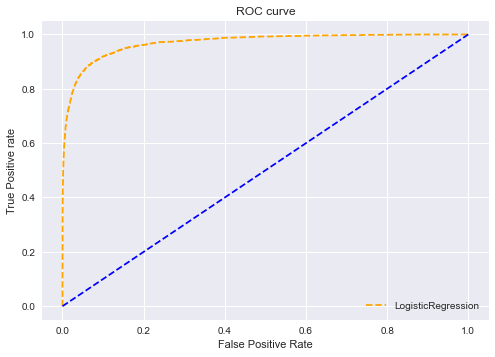

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Saving The Model

In [72]:
import joblib
joblib.dump(model ,'Malignant_comments_classifier.pkl')
joblib.dump(model,open('Malignant_comments_classifier.pkl','wb'))

## Test Dataset Predictions

In [73]:
# saving the best classification model
import joblib
best_model = joblib.load('Malignant_comments_classifier.pkl')


In [ ]:
test_vec.toarray()

In [ ]:
# Make predictions and view the results
predict_datatest = model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_datatest).to_csv('Predicted_test_output.csv')

In [ ]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
df

In [ ]:
df.to_csv('test_dataset_predictions2.csv', index=False)

Finally, we had predicted over the test dataset  and  saved in a csv file.